This is a notebook describing the plotting for the HCN paper. Details of observations: 

Target: EGS13004291 

z = 1.197 

Coordinates: 

In [1]:
import numpy as np
import CC_dl
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt 
from astropy import constants as const
%matplotlib inline
c = 299792.458

In [2]:
def load(fname):
    ''' load the file using std open'''
    f = open(fname,'r')

    data = []
    for line in f.readlines():
        data.append(line.replace('\t',''))

    f.close()

    return data

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

# function to calculate luminosity in K km/s pc^2 using Solomon2005 formula, given a redshift,dl (Mpc), sco (Jy km/s)
# and rest frequency 
def Lprime(z, sco, nu_rest, cosmo): 
    dl = CC_dl.main(z,cosmo,verbose=-1)
    temp = 3.25*10.**7. *dl**2. *sco
    temp2 = ((1.+z) *nu_rest**(2.))
    return temp/temp2

# defining a function to give new luminosity values given an old and a new cosmology, and L and z 
def SwCos(L, oldCosPar, newCosPar): 
    dl_new = CC_dl.main(newCosPar)
    dl_old = CC_dl.main(oldCosPar)
    Lnew = L*(dl_new/dl_old)**2
    return Lnew

# function to calculate integrated line flux using Solomon2005 formula, given a redshift,dl (Mpc), sco (Jy km/s)
# and rest frequency 
def SdelV(z, dl,sco, nu_rest): 
    temp = 3.25*10.**7. *dl**2. *sco
    temp2 = ((1.+z) *nu_rest**(2.))
    return temp/temp2

In [3]:
#defining used cosmologies 
gao2004 = [75.,0.3,0.7]
greve2005 = [71., 0.27,0.73]
carilli2005 = [70.,0.3,0.7] 
gao2007 = [75., 0.3, 0.7]
riechers2011 = [71., 0.27,0.73]
standard=[70,0.3,0.7]

In [4]:
# loading information 
# columns are       
#        read dlum    1
#        read lglco   2
#        read lglir   3
#        read lglfir  4
#        read lglhcn  6

# I *think* these are in the cosmology they used in the paper and therefore need to be slightly adjusted, but my I don't have all my notes from back then here at the moment (I wrote some of this stuff on paper that is likely in some box). You perhaps want to check 1-2 examples to confirm. Of course, for the line luminosity ratios, this does not really matter, but if you plot vs L_FIR or similar it has a small impact.
# The file with all the data indicates which ones are the lower and upper limits in L_HCN (lower if not fully mapped, upper if undetected).

alldatanames = np.loadtxt('/home/ag/DOCS/PROJECT/PdBI/Paper/gs04data/alldata_names.d',dtype='string')
spirals = np.loadtxt('/home/ag/DOCS/PROJECT/PdBI/Paper/gs04data/spirals.d')
ulirgs = np.loadtxt('/home/ag/DOCS/PROJECT/PdBI/Paper/gs04data/ulirgs.d')
gao2004dat = np.loadtxt('/home/ag/DOCS/PROJECT/PdBI/Paper/gao2004A_mod.txt', dtype='string') 
listz = np.loadtxt('/home/ag/DOCS/PROJECT/PdBI/Paper/gs04data/list.z',dtype='string')

# the last contains upper limits and such

In [5]:
names = alldatanames[:,0]
flag=np.zeros(np.shape(names))
newds=np.zeros(np.shape(names))
alldat=np.zeros(np.shape(alldatanames))
#alldatanames[:,1:].shape

In [93]:
alldat[:,:10] = alldatanames[:,1:].astype(np.double) # reads log luminosities 
 # low redshift compiled data from Gao2004
lozco=alldat[:,1]   # CO luminosities, in log10(LCO)
lozIR=alldat[:,2]
lozfir=alldat[:,3]
lozhcn=alldat[:,5]

In [7]:
# there are supposed to be 32 ULIRGS, and 33 spirals.
# based on the IR limit, we are identifying the ULIRGS and spirals 
count = 0
for i in range(0,65): 
    if (alldat[i,2] >= 11.): 
        alldat[i,10] = +1       # ulirgs 
        count=count+1
    else: 
        alldat[i,10] = -1       # spirals
count # number of ULIRGS 

32

In [8]:
# calculating all the fluxes, using only their given Dl and L values 
# rescaling the old data, with the (new luminosity distance/old luminosity distance) squared

for i in range(len(alldat)): 
    dold = alldat[i,0]
    dnew=CC_dl.main(float(listz[i,1]),riechers2011) 
    newds[i]= dnew
    err = (dnew - dold)/dold
    if(float(listz[i,1])-0.005> 0.0 and err < 0.2): 
        lozco[i] = np.log10(10.**alldat[i,1]*(dold/dnew)**-2.) 
        lozIR[i] = np.log10(10.**alldat[i,2]*(dold/dnew)**-2.) 
        lozfir[i] = np.log10(10.**alldat[i,3]*(dold/dnew)**-2.) 
        lozhcn[i] = np.log10(10.**alldat[i,5]*(dold/dnew)**-2.)
    if(err > 0.1): 
        print 'warning: significant change in d+l'
        print alldatanames[i,0], listz[i][1], dold, dnew, i

13.65 3.42 0.02 27.67
N253 0.000811 2.5 3.42660401842 0
13.39 84.39 0.40 34.67
13.63 11.96 0.06 30.40
13.23 136.20 0.64 35.74
13.26 126.83 0.60 35.58
13.64 7.43 0.04 29.36
13.60 20.45 0.10 31.56
13.62 13.98 0.07 30.74
13.61 16.00 0.08 31.03
13.28 121.09 0.57 35.48
13.59 23.02 0.11 31.82
N1365 0.005457 20.8 23.1418913086 10
13.66 0.43 0.00 23.19
13.45 67.08 0.32 34.17
12.95 224.12 1.03 36.87
13.10 178.15 0.83 36.34
I05189 0.042563 167.5 185.736064725 14
13.62 12.57 0.06 30.50
13.56 33.97 0.16 32.67
13.14 164.61 0.77 36.17
13.64 7.74 0.04 29.45
N2903* 0.001834 6.2 7.75525391126 18
13.14 164.89 0.77 36.17
13.66 2.86 0.01 27.28
13.61 15.71 0.08 30.99
13.48 56.57 0.27 33.79
13.20 144.75 0.68 35.88
13.63 9.84 0.05 29.97
13.63 10.23 0.05 30.06
N3627* 0.002425 7.6 10.2591762158 25
13.63 11.87 0.06 30.38
N3628 0.002812 7.6 11.9000720204 26
13.62 13.61 0.07 30.68
13.60 20.61 0.10 31.58
N4030 0.004887 17.1 20.7153028505 28
13.61 17.37 0.08 31.21
13.63 10.08 0.05 30.02
13.64 8.53 0.04 29.66
13.65 

(<module 'numpy' from '/usr/lib64/python2.7/site-packages/numpy/__init__.pyc'>,
 array([ 1.00732095,  1.06145248,  1.01953168,  1.06182931,  1.05269394,
         1.01577876,  1.01157044,  1.0094509 ,  1.04414762,  1.05269394,
         1.04020663,  1.        ,  1.0576661 ,  1.0733517 ,  1.07518185,
         1.03582983,  1.0277572 ,  1.06333336,  0.99033885,  1.07408469,
         1.0211893 ,  1.02325246,  1.07481644,  1.05918462,  1.00086772,
         0.99825934,  0.99519629,  0.99738638,  1.01072387,  1.00475116,
         0.99033885,  1.00817418,  0.96894968,  1.00346053,  0.99825934,
         1.04257551,  1.00043408,  1.08098705,  1.01577876,  1.01994668,
         1.02036128,  1.09096308,  1.06483222,  1.03862016,  1.04610479,
         1.00216606,  1.04960561,  1.04218159,  1.01786772,  1.0576661 ,
         1.0277572 ,  1.08134731,  1.05307844,  1.08919837,  1.0824263 ,
         1.06707086,  1.06032003,  1.06669855,  1.04999286,  1.05115252,
         1.03462846,  1.0277572 ,  1.0244856

/usr/lib64/python2.7/site-packages/matplotlib/collections.py:526: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


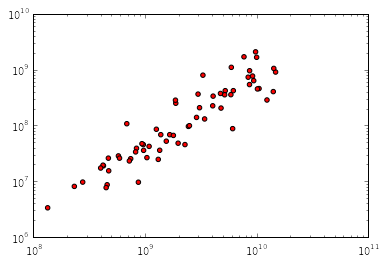

In [9]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(10**lozco, 10**lozhcn, c='red')

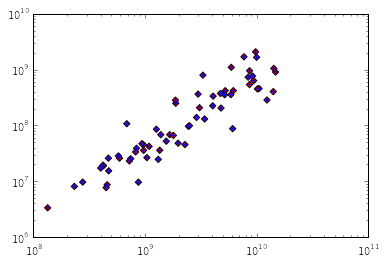

In [10]:
plt.xscale('log')
plt.yscale('log')
hcn1 = (alldat[:,5])
co1 = (alldat[:,1])
fir1 = (alldat[:,3])
plt.scatter(10**lozco, 10**lozhcn, c='red', marker='D')
plt.scatter(10**co1, 10**hcn1, c='blue', marker='+')

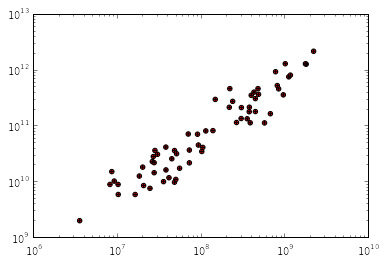

In [11]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(10**hcn1,10**fir1,marker='o',c='red')
plt.scatter(10**lozhcn,10**lozfir,marker='+', c='black')

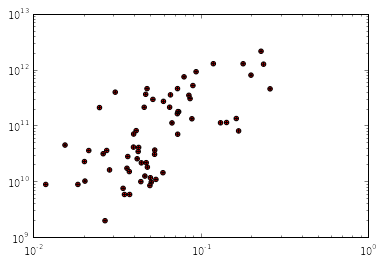

In [12]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(10**hcn1/10**co1,10**fir1,marker='o',c='red')
plt.scatter(10**lozhcn/10**lozco,10**lozfir,marker='+', c='black')

In [13]:
z = 1.197 # redshift 
nu_rest = 177.2612 # rest frequency in GHz 
dl_stan = CC_dl.main(z,standard)
dl = CC_dl.main(z,riechers2011)

5.04 3756.62 8.29 44.58
5.21 3780.57 8.34 44.60


In [14]:
# The beam sizes for Herschel 100, 250, 350 and 500 $\mu$m bands are -- 
# The nearby sources XX and YY are XX and YY arcsec separated, respectively,
# These will be a concern for the bands XX 
# To check, 

# (i) Compare obtained values in radio-FIR correlation - for all three of the sources. 
# (ii) Remove the last few bands and see how the fits change for each 

# main source SDSS J141914.95+524929.5  
c1 = SkyCoord('14h19m14.95s','52d49m29.5s', frame='fk5') # ned coordinates for each 

# other EGS J141917.4+524922, z = 1.8, 
c2 = SkyCoord('14h19m17.4s','52d49m22s', frame='fk5')  

# third source EGSIRAC J141912.03+524924.0 

c3 = SkyCoord('14h19m12.03s','52d49m24.0s', frame='fk5') 

sep1 = c1.separation(c2).arcsec
sep2 = c1.separation(c3).arcsec
print (sep1,sep2)

# Herschel beams FWHM in '' 

beam100 = 9  
beam160 = 15
beam250 = 17.6 
beam350 = 23.9 
beam500 = 35.2 

# so we can expect blending in the last two, especially at 500$\mu$m. 
# Use HIPE and timelinefitter to extract the fluxes 
# Even though the Hershel fluxes are from the de-blended catalog. 
# So, check how the results change when remove the last one, then the last 2. 
# Get the IR fluxes from the other two. Check if they are identified in either Herschel or Radio 



(23.439155610863576, 27.03219731689609)


OBSID = 1342190294   #test obsID 
from herschel.ia.pal.pool.hsa import MyHSAConnection
hsaStore = ProductStorage(MyHSAPool.getNewInstance(MyHSAConnection.ON))
obsid_v1342190294 = hsaStore.load('urn:hsa:herschel.ia.obs.ObservationContext:643488').product
del(hsaStore)
obs=obsid_v

sourceList2 = sourceExtractor(image=PSW, algorithm="daophot", detThreshold=7.0, fwhm=22.0, pixelRegion=1.5, beamArea=495.0, fluxPriorsLambda=0.0, fitBackground=True, useSignalToNoise=False, fluxPriorsMin=1.0E-4, fluxPriorsMax=1.0E8, getFilteredMap=False, getPrf=False, doApertureCorrection=True)

srcl=sourceExtractorTimeline(input=obs.level1,array='PSW',rPeak=22.0, inputSourceList=sourceList2,allowVaryBackground=True, useBackInFit=True,rBackground=Double1d([70,74]))

srcl2=sourceExtractorTimeline(input=obs.level1,array='PMW',rPeak=30.0, inputSourceList=sourceList2,allowVaryBackground=True, useBackInFit=True,rBackground=Double1d([98,103]))

srcl3=sourceExtractorTimeline(input=obs.level1,array='PLW',rPeak=42.0, inputSourceList=sourceList2,allowVaryBackground=True, useBackInFit=True,rBackground=Double1d([140,147]))


In [15]:
# Calculating the IR and FIR luminosities from magphys_highz output 
magphys_out = np.loadtxt('/home/ag/DOCS/PROJECT/PdBI/magphys/magphys_highz/13004291.sed.spec',dtype='double')
magphys_in_temp = np.loadtxt('/home/ag/DOCS/PROJECT/PdBI/magphys/magphys_highz/observations_full.dat.complete',dtype='double')
magphys_in = magphys_in_temp[2::2]
filters = np.loadtxt('/home/ag/DOCS/PROJECT/PdBI/magphys/magphys_highz/filters.dat.orig',dtype='string')
lambs_filts = filters[:,1].astype(np.double)
listLambAng = 10.**(magphys_out[:,0])
attAF = magphys_out[:,1] # over this range because the fit fails at the edges 
attUF = magphys_out[:,2]
listLambMic  = listLambAng/1.e4
attAFL = np.zeros((np.shape(attAF)))
attUFL = np.zeros((np.shape(attUF)))
attAFjy = np.zeros((np.shape(attAF)))
attUFjy = np.zeros((np.shape(attUF)))

# converting to Jy 
attAFjy = (10.**(attAF)*(1.+z) *listLambMic/(4.*pi*dl_stan**2) /c)
attUFjy = (10.**(attUF)*(1.+z) *listLambMic/(4.*pi*dl_stan**2) /c)
attAFL = attAF  + np.log10(listLambAng)
attUFL = np.log10(10.**(attUF) *listLambAng)

L_flux=np.log10((1.+z)*magphys_in*3.e+14/lambs_filts)

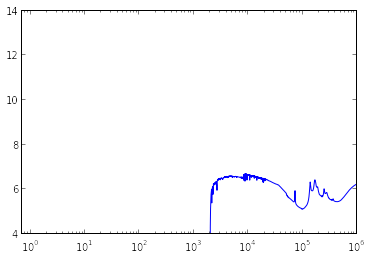

In [16]:
fig = plt.figure()
plt.xscale('log')
plt.xlim(0.7,1e6)
plt.ylim(4,14)

plt.plot(listLambAng,attAF)
#plt.plot(listLambMic,attUFjy)
#plt.plot(lambs_filts,1.09*L_flux, marker='o')

In [17]:
def sed_integral(att,lamb1,lamb2): 
    [lambs, flux] = att 
    integ = 0. 
    indx1 = find_nearest(lambs,lamb1)
    indx2 = find_nearest(lambs,lamb2)
    print 'Found indices:', indx1, indx2
    print 'Corresponding to', lambs[indx1], lambs[indx2]
    for i in range(indx1,indx2): 
        delL = lambs[i] - lambs[i-1]
        integ = integ + flux[i]*delL
    print 'Integrated SED is', integ, 'in L_{\odot}'
    return integ 

In [18]:
# Radio-FIR correlation 
# Ivison 2010

# S_IR/(W m^-2) = 10^(12.57 + 2.54) *S_{1.4GHz}/(W m^-2 Hz^-1) 


def ivison_fir_radio(s1400,dl): 
    
    sir = 10**(2.41 + np.log10(s1400) ) *3.25e12
    print 'In units of watts m^-2, from 8-1000 \mum; input in units of Wm^-2 Hz^-1 '
    Lir = sir*(4.*pi*(dl*3.086e22)**2)/(3.828*10**26) # converting from Wm^-2 to L\odot
    print 'Luminosity', Lir, '\nLog Luminosity: ', np.log10(Lir)
    return np.log10(Lir)

def yun2001(s1400,dl): 
    ffir=  10**(2.34 + np.log10(s1400) ) *3.25e12
    print 'In units of watts m^-2, the FIR luminosity'
    Lffir = ffir*(4.*pi*(dl*3.086e22)**2)/(3.828*10**26) # converting from Wm^-2 to L\odot
    print 'Luminosity', Lffir, '\nLog Luminosity: ', np.log10(Lffir)
    return np.log10(Lffir)
    # defined as LLFIR = 1.26e-14(2.58*S_60 + S100) W^-2, Ss are IRAS fluxes in Jy 


In [19]:
LFIR = sed_integral([listLambAng,10.**attAF],(425000.)*(1.+z),1225000.*(1.+z)) # this is calculated LFIR from SED fit
LIR = sed_integral([listLambAng,10.**attAF],80000.*(1.+z),10000000*(1.+z))

Found indices: 12598 12644
Corresponding to 932846.099582 2691324.09759
Integrated SED is 2.68339179378e+12 in L_{\odot}
Found indices: 8240 12723
Corresponding to 175781.837512 21552566.809
Integrated SED is 3.95073859149e+12 in L_{\odot}


In [20]:
LIR_pred = ivison_fir_radio(270.e-32, dl) # the 20cm integrated flux density is 0.270 mJy, and output is integrated LIR 
LFIR_pred = yun2001(270.e-32, dl) # this is supposed to be the LFIR luminosity (between 42.5 and 122.5 microns?)

In units of watts m^-2, from 8-1000 \mum; input in units of Wm^-2 Hz^-1 
Luminosity 4.86454790426e+12 
Log Luminosity:  12.6870424845
In units of watts m^-2, the FIR luminosity
Luminosity 4.14040175997e+12 
Log Luminosity:  12.6170424845


In [21]:
print 'log(LIR) (8-1000 microns)', np.log10(LIR), '; predicted', LIR_pred 
print 'log(LFIR) (42-122 microns)', np.log10(LFIR), '; predicted', LFIR_pred

log(LIR) (8-1000 microns) 12.5966782947 ; predicted 12.6870424845
log(LFIR) (42-122 microns) 12.4286840873 ; predicted 12.6170424845


In [22]:
sed_integral([listLambAng,10.**attAF],1225000,10000000)/LIR

Found indices: 12610 12701
Corresponding to 1229880.73862 9996362.57726
Integrated SED is 2.88156133931e+12 in L_{\odot}


0.72937281791199648

In [23]:
LHCN21  =  1.45e9 
LCO21 = 4.99e10
LCO32 = 3.93e10

In [24]:
print np.log10(LFIR/LHCN21)
print np.log10(LCO21/LHCN21)

3.26731608507
1.53673254339


In [25]:
LFIR/LIR 

0.67921269191464073

In [26]:
# This is equal to 4.0957 \lsun 

In [27]:
np.log10(4.0957e+12 )

12.612328138124974

In [28]:
(LFIR)/10**(1.13*np.log10(LCO21) + 0.53)

0.64540224352166697

In [29]:
LFIR/1.e12

2.6833917937769396

In [30]:
np.log10(sed_integral([listLambAng,10.**attAF],80000.,10000000.))

Found indices: 6498 12701
Corresponding to 80190.5145174 9996362.57726
Integrated SED is 4.01995353776e+12 in L_{\odot}


12.604221033578884

Now plotting the following: 

-------

* LHCN vs LCO 
* LFIR/LHCN, 
* LFIR vs LHCN/LCO 
 

### defining all the archival L-CO values; 


Now for the HCN flux values
#######################

all L values in  10^9 K km/s pc^-2;LFIR in 10^12 Lsun 

| Source      | z      | HCN | HCN_err| CO   | CO_err | LFIR| Ref |
| :-----------|-------:|----:|------:|------:|--------:|---------|
| J1409+5628  | 2.583  | 6.9 | 2.3  | 85.5 | 22.17  | 20.1 | Carilli 2005, Gao 2007  
| **APM08279**    | 3.911  | **11.6**| 1.4  | 25.2 | 2.1    | 0.29  | HCN 5-4  (uncorrected), Riechers 2009, Gao 2007  
| **Cloverleaf**  | 2.5511 | **7.74**| 1.49 | 39.3 | 1.1    | 5.9 | (corrected), Riechers 2011, Gao 2007  
| F10214+4724 | 2.286  | 1.80| 0.36 | 5.77 | 0.49   | 4.0 |(corrected), Riechers 2011, Gao 2007
| J0911+0551  | 2.7961 |< 0.80  | 0.27 * | 3.39 | 0.48    | 2.5 |  corrected 
| J04135+10277| 2.846  |< 30.63 | 10.2 * | 184  | 23      | 26.1 |corrected
| MG 0751+2716| 3.1990 |< 1.03  | 0.35 * | 14.9 | 2.0     | 3.2 |Carilli 2005, Riechers 2011|
| SMM J16359B | 2.517  | 0.62   | 0.15 * | 5.5  | 0.6     | 1.1 | Thomson 2012, Gao 2007, corrected
| SMM J02399  | 2.8083 | < 47.4 | 12 *   | 48   | 8       | 33.2 | Greve 2005, corrected 
| BR1202-0725 | 4.693  | < 43.9 | 14 *   | 103.9 |  10.1  | 65.7 | Isaak 2004,
| J1148+5251  | 6.419  | < 3.3  | 1.1 *  | < 142 | 47 *   | 23.9 | Riechers 2007
| J14011+0252 | 2.565  | < 1.6  | 0.5 *  | 100   |  9.38  | 7.1 | Carilli 2005
| J02396-0134 | 1.062  | < 2.9  | 0.9 *  | 20.6  | 2      | 7.07 | Gao 2007 corrected for \mu = 2.5
| Eyelash     | 2.3259 | < 4.5  | 1.5 *  | 17.5  |  0.9   |  2.7| corrected, danielson 2012
| B1938+666   | 0.8809 | 114.3  | 45.2   | 38  | 4.6 | 0.22 | Riechers 2011   
| ESG13004291 | 1.197  | 1.45  | 0.7 | 49.9 | 5.0 | 2.68 | Me
arr = [17.,0.25,5.0,3.4,2.1,22.,2.7,0.93,28.,55.,20.,1.0, 6.1, 2.3, 0.19]
modified LFIR = array([ 20.11616292,   0.29788979,   5.9150996 ,   4.01344323,          2.4886348 ,  26.07979403,   3.20720712,   1.09992054,         33.18443419,  65.69572294,  23.97159281,   7.0988656 ,          7.07068305,   2.71594199,  0.21921826       ]

All LFIR values from Gao2007, except J14011 which is from Ivison 2001. 

\* error not provided 

In [122]:
# defining all the high redshift data
# the columns are z,  hcn, hcn_err,co, co_err, flag (to signify upper limits), lfir 

hiz_lums = np.zeros((16,8))  
hiz_lums[:,0] = [2.583, 3.911, 2.5511, 2.286, 2.7961, 2.846, 3.1990, 2.517, 2.8083, 4.693, 6.419, 2.565, 1.062, 2.3259, 0.8809, 1.197 ]
hiz_lums[:,1] = [6.9, 11.6, 7.74, 1.80, 0.80, 30.63, 1.03, 0.62, 47.4, 43.9, 3.3, 1.6, 2.9, 4.5, 114.3, 1.45 ] 
hiz_lums[:,2] = [2.3, 1.4, 1.49, 0.36, 0.27, 10.2, 0.35, 0.15, 12, 14, 1.1, 0.5, 0.9, 1.5, 45.2,0.7]
hiz_lums[:,3] = [85.5, 25.2, 39.3, 5.77, 3.39, 184, 14.9, 5.5,48, 103.9, 142, 100. , 20.6, 17.5, 38.,49.9]
hiz_lums[:,4] = [22.17, 2.1, 1.1, 0.49, 0.48, 23., 2.0, 0.6, 8., 10.1, 47., 9.38, 2., 0.9, 4.6, 5.0]
hiz_lums[:,7] = [1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1, 1]

arrFIR = [17.,0.25,5.0,3.4,2.1,22.,2.7,0.93,28.,55.,20.,6.0, 6.1, 2.3, 0.19]
for i in range(0,15):
    dold = CC_dl.main(hiz_lums[i,0],gao2007)
    dnew = CC_dl.main(hiz_lums[i,0],riechers2011)
    hiz_lums[i,5] = hiz_lums[i,1]/hiz_lums[i,3]
    hiz_lums[i,6] = arrFIR[i]*(dold/dnew)**-2

hiz_lums[15,6] = 2.68
hiz_lums[15,5] = hiz_lums[15,1]/hiz_lums[15,3]
hiz_lums[:,6]
# hiz_lums[15,:]

2.32 5526.84 7.48 46.48
2.58 6012.11 8.13 46.67
1.45 6632.70 6.55 47.56
1.61 7240.20 7.15 47.75
2.35 5493.15 7.50 46.45
2.61 5974.74 8.16 46.63
2.63 5195.50 7.67 46.16
2.93 5644.79 8.33 46.34
2.13 5741.37 7.33 46.69
2.37 6250.12 7.98 46.88
2.09 5789.11 7.30 46.74
2.32 6303.11 7.95 46.92
1.83 6103.06 7.05 47.04
2.04 6651.69 7.68 47.23
2.38 5456.66 7.52 46.42
2.65 5934.28 8.18 46.60
2.12 5753.12 7.32 46.70
2.35 6263.17 7.97 46.89
1.16 7097.77 6.04 48.03
1.29 7757.33 6.61 48.23
0.78 7852.49 5.13 48.83
0.87 8596.96 5.62 49.02
2.33 5507.88 7.49 46.47
2.60 5991.08 8.15 46.65
5.14 3221.64 7.57 44.11
5.69 3468.51 8.16 44.27
2.59 5242.43 7.64 46.21
2.87 5696.80 8.30 46.39
5.84 2803.42 7.23 43.61
6.45 3011.27 7.76 43.77


array([ 20.11616292,   0.29788979,   5.9150996 ,   4.01344323,
         2.4886348 ,  26.07979403,   3.20720712,   1.09992054,
        33.18443419,  65.69572294,  23.97159281,   7.0988656 ,
         7.07068305,   2.71594199,   0.21921826,   2.68      ])

In [123]:
fir1

array([ 10.17,  11.52,  10.46,  11.53,  11.29,  10.37,  10.27,  10.22,
        11.07,  11.29,  10.97,  10.  ,  11.42,  11.84,  11.89,  10.86,
        10.66,  11.57,   9.78,  11.86,  10.5 ,  10.55,  11.88,  11.46,
        10.02,   9.96,   9.89,   9.94,  10.25,  10.11,   9.78,  10.19,
         9.31,  10.08,   9.96,  11.03,  10.01,  12.05,  10.37,  10.47,
        10.48,  12.33,  11.61,  10.93,  11.12,  10.05,  11.21,  11.02,
        10.42,  11.42,  10.66,  12.06,  11.3 ,  12.28,  12.09,  11.67,
        11.49,  11.66,  11.22,  11.25,  10.83,  10.66,  10.58,  10.35,
        10.51])

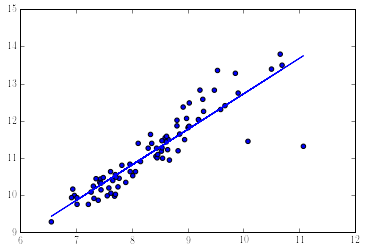

In [125]:
x = np.log10(np.append(1.e9*hiz_lums[:15,1],10**lozhcn))
y = np.log10(np.append(1.e12*hiz_lums[:15,6],10**lozfir))
plt.scatter(x,y)
m,b = np.polyfit(x,y, 1)
plt.plot(x,m*x+b, '-')

In [126]:
np.log10(1.e12*hiz_lums[:15,6])

array([ 13.30354514,  11.47405562,  12.77196206,  12.60351712,
        12.39596117,  13.41630416,  12.50612701,  12.04136131,
        13.52093442,  13.8175371 ,  13.37969689,  12.85118895,
        12.84946137,  12.43392049,  11.34087672])

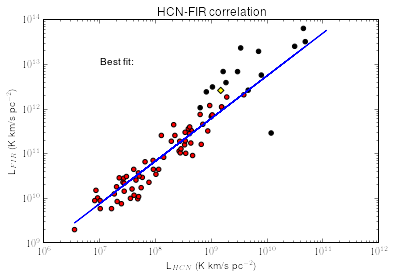

In [131]:
plt.xscale('log')
plt.yscale('log')
plt.title('HCN-FIR correlation')
plt.ylabel('L$_{FIR}$ (K km/s pc$^{-2}$)')
plt.xlabel('L$_{HCN}$ (K km/s pc$^{-2}$)')
plt.text(10**7, 10**13, 'Best fit: ')
plt.scatter(1.e9*hiz_lums[:14,1],1.e12*hiz_lums[:14,6], c='black')
plt.scatter(10**lozhcn,10**lozfir,marker='o',c='red')
plt.scatter(1.e9*hiz_lums[15,1],1.e12*hiz_lums[15,6], marker='D', c='yellow')
plt.plot(10**x, 10**(m*x +b), '-')
plt.savefig('/home/ag/DOCS/PROJECT/PdBI/Paper/plot/hcn-fir.eps', format='eps', dpi=500)

LFIR-LHCN correlation for the currently known sample of high redshift (XX marker) and low-redshift( YY marker) sources \citep{gao2004,gao2007}. EGS 13004291 is shown as ZZ. The observed HCN luminosity is consistent with the extant FIR-HCN relation. The best fit is given by .. Upper limits have been denoted by ..  

In [155]:
sfr =  LFIR*1.e-10 # chapman 2000 
sfr # Kennicutt 1998 
# or 
sfr = LFIR*1.7e-10
sfr

456.17660494207973

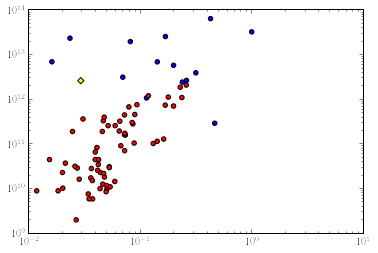

In [132]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(hiz_lums[:14,5],1.e12*hiz_lums[:14,6])
plt.scatter(10**lozhcn/10**lozco,10**lozfir,marker='o',c='red')
plt.scatter(hiz_lums[15,5],1.e12*hiz_lums[15,6], marker='D', c='yellow')

The LFIR (equivalnt to the star formation rate) vs the dense gas fraction ( ~ LHCN/LCO). At low redshifts, the slope is much steeper, indicating 


In [721]:
lozrat_hcn_co = 10**lozhcn/10**lozco
sorted_hcn_co_lozrat = np.sort(10**lozhcn/10**lozco)
for i in range(0,16): 
    temp = find_nearest(lozrat_hcn_co,sorted_hcn_co_lozrat[i])
    print alldatanames[temp][0:4], listz[temp], sorted_hcn_co_lozrat[i]
alldatanames[64]

['N5055*' '7.3' '8.932' '10.04'] ['N5055' '0.001614'] 0.0116949939102
['N3147' '39.5' '9.771' '10.79'] ['N3147' '0.009346'] 0.015240527538
['N3627*' '7.6' '8.643' '10.10'] ['N3627' '0.002425'] 0.0181970085861
['N891' '10.0' '9.110' '10.46'] ['N891' '0.001761'] 0.0199067333899
['N3556*' '10.6' '8.652' '10.13'] ['N3556' '0.002332'] 0.0200447202737
['N1530' '35.4' '9.362' '10.67'] ['N1530' '0.008209'] 0.0211348903984
['N1144' '118.0' '10.037' '11.40'] ['N1144' '0.028847'] 0.0244906324184
['M51' '9.6' '9.288' '10.62'] ['M51' '0.002000'] 0.02576321157
['N4826*' '4.7' '8.119' '9.41'] ['N4826' '0.001361'] 0.0264240875732
['N5713' '24.0' '8.910' '10.62'] ['N5713' '0.006334'] 0.0270395836411
['N1055**' '14.8' '9.123' '10.31'] ['N1055' '0.003314'] 0.028119008304
['Arp55' '162.7' '10.097' '11.66'] ['Arp55' '0.039300'] 0.0304088502568
['N3628' '7.6' '8.851' '10.00'] ['N3628' '0.002812'] 0.0338844156139
['N4414' '9.3' '8.666' '9.91'] ['N4414' '0.002388'] 0.0345143739336
['N4030' '17.1' '9.182' '10.

array(['M51', '9.6', '9.288', '10.62', '10.51', '1.34', '7.699', '-1.59',
       '108.6', '291.7', '1.80'], 
      dtype='|S7')

In [ ]:
# Get the gas mass, the star formation rate from the LFIR, 

In [124]:
# rough work. 
# for J1409 

z = 2.583
dold = CC_dl.main(2.583,carilli2005)
dnew = CC_dl.main(2.583,riechers2011)

6.7*(dold/dnew)**-2
2.2*(dold/dnew)**-2


print riechers2011
Lprime(z, 0.07, fCO10, riechers2011)/1.e9

# for APM08279 

z = 3.911

0.9/4.2

# cloverleaf HCN 

z = 2.5511

Lprime(z, 2.6, fHCN10*4., riechers2011)/1.e9 /11.

# F10214 
z = 2.286

Lprime(z, 0.01, fHCN10, riechers2011)/1.e9 /12

# J0911 
z = 2.7961

Lprime(z, 0.029/22, fHCN10, riechers2011)/1.e9

# J04135

z = 2.846
Lprime(z, 48.46/1000, fHCN10, riechers2011)/1.e9

# MG 0751+2716 

z = 3.1990
dold = CC_dl.main(3.200,carilli2005)
dnew = CC_dl.main(3.199,riechers2011)

1.*(dold/dnew)**-2


# J1635 

z = 2.517
dold = CC_dl.main( 2.517,carilli2005)
dnew = CC_dl.main( 2.517,riechers2011)

0.6*(dold/dnew)**-2


Lprime(z, 0.040/22, fCO10, riechers2011)/1.e9

#  SMM J02399  
    
z =2.8083
dold = CC_dl.main( 2.517,carilli2005)
dnew = CC_dl.main( 2.517,riechers2011)

46*(dold/dnew)**-2


20/2.5

# BR 1202 

z = 4.693
Lprime(z, 0.031, fHCN10, riechers2011)/1.e9

dold = CC_dl.main(4.693,[75,0.3,0.7])
dnew = CC_dl.main(4.693,riechers2011)

93*(dold/dnew)**-2

Lprime(z, 0.012, fCO10, riechers2011)/1.e9

# J1148 

z = 6.419
Lprime(z, 94.6/1000, fCO10, riechers2011)/1.e9


# 14011 

z = 2.565 

Lprime(z, 0.03, fCO10, riechers2011)/1.e9

# 2396 

29.2 


z = 1.062 
Lprime(z, 29.2/1000, fHCN10, riechers2011)/1.e9

# Lprime(z, 1.36, fCO10, riechers2011)/1.e9


dold = CC_dl.main(1.062,[75,0.3,0.7])
dnew = CC_dl.main(1.062,riechers2011)

19*(dold/dnew)**-2


dold = CC_dl.main(1.062,[70,0.3,0.7])
dnew = CC_dl.main(1.062,riechers2011)

5*(dold/dnew)**-2 /2.5


# eyelash 

z = 2.3259

Lprime(z, 0.11, fCO10, riechers2011)/1.e9 /32.5

# BR 1938 

z =  0.8809 

Lprime(z, 0.64, fHCN10, riechers2011)/1.e9
Lprime(z, 0.11, fCO10, riechers2011)/1.e9


# LFIRs for them all 



2.48 5921.49 8.01 46.63
2.58 6012.11 8.13 46.67
[71.0, 0.27, 0.73]
2.58 6012.11 8.13 46.67
2.61 5974.74 8.16 46.63
2.93 5644.79 8.33 46.34
2.37 6250.12 7.98 46.88
2.32 6303.11 7.95 46.92
1.96 6539.73 7.55 47.19
2.04 6651.69 7.68 47.23
2.55 5846.30 8.06 46.57
2.65 5934.28 8.18 46.60
2.65 5934.28 8.18 46.60
2.55 5846.30 8.06 46.57
2.65 5934.28 8.18 46.60
1.29 7757.33 6.61 48.23
1.16 7097.77 6.04 48.03
1.29 7757.33 6.61 48.23
1.29 7757.33 6.61 48.23
0.87 8596.96 5.62 49.02
2.60 5991.08 8.15 46.65
5.69 3468.51 8.16 44.27
5.14 3221.64 7.57 44.11
5.69 3468.51 8.16 44.27
5.51 3451.72 8.12 44.26
5.69 3468.51 8.16 44.27
2.87 5696.80 8.30 46.39
6.45 3011.27 7.76 43.77
6.45 3011.27 7.76 43.77


4.588736695598764

In [51]:
fHCN21 = 177.2612 
fHCN10 = 88.632
fHCOP21 = 278.3750 
fCO10 = 115.27120


In [61]:
dl = CC_dl.main(2.5511,riechers2011)
dl

2.61 5974.74 8.16 46.63


21216.329272755363

In [59]:
3.25e7 * 2.6 /(fHCN10*4/(1. + z))**2 * dl**2 *(1.+z)**-3 /1.e9

85.21836922507991

In [7]:
# defining all the high redshift data
# the columns are z, co, co_err, hcn, hcn_err, flag (to signify upper limits)

hiz_lums

array([[  2.58300000e+00,   6.90000000e+00,   2.30000000e+00,
          8.55000000e+01,   2.21700000e+01,   1.00000000e+00],
       [  3.91100000e+00,   1.16000000e+01,   1.40000000e+00,
          2.52000000e+01,   2.10000000e+00,   1.00000000e+00],
       [  2.55110000e+00,   7.74000000e+00,   1.49000000e+00,
          3.93000000e+01,   1.10000000e+00,   1.00000000e+00],
       [  2.28600000e+00,   1.80000000e+00,   3.60000000e-01,
          5.77000000e+00,   4.90000000e-01,   1.00000000e+00],
       [  2.79610000e+00,   8.00000000e-01,   2.70000000e-01,
          3.39000000e+00,   4.80000000e-01,  -1.00000000e+00],
       [  2.84600000e+00,   3.06300000e+01,   1.02000000e+01,
          1.84000000e+02,   2.30000000e+01,  -1.00000000e+00],
       [  3.19900000e+00,   1.03000000e+00,   3.50000000e-01,
          1.49000000e+01,   2.00000000e+00,  -1.00000000e+00],
       [  2.51700000e+00,   6.20000000e-01,   1.50000000e-01,
          5.50000000e+00,   6.00000000e-01,   1.00000000e+00],


In [719]:
print (Lprime(0.002,6*0.109, fHCN10, riechers2011)/1.e9)/(Lprime(0.002,10*0.248, fCO10, riechers2011)/1.e9)

13.39 84.10 0.40 34.67
13.39 84.10 0.40 34.67
0.446053136315


In [718]:
5.8/

0.025773195876288662

In [714]:
alldatanames[64]

array(['M51', '9.6', '9.288', '10.62', '10.51', '1.34', '7.699', '-1.59',
       '108.6', '291.7', '1.80'], 
      dtype='|S7')

In [715]:
lozFIR[64]

10.51